In [1]:
import numpy as np
import pandas as pd
from scipy import optimize

import matplotlib.pyplot as plt

import multipletau

In [2]:
%pdb

Automatic pdb calling has been turned ON


In [3]:
def func_(x, T, c):
    return (( ((T-x)/(c*T**2)) * np.heaviside((T-x),0)) )

# Single track analysis

In [5]:
# read one file
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/1-ConfirmData/movie twiCrispr/"
file = "M142Het CJD1 ultrafast 0_10 in nc13 e1_Airyscan Processing/track_spot_table.csv"
f = path+file
datas = pd.read_csv(f) 
datas.drop(index=[0,1,2], inplace=True)
datas['FRAME'] = pd.to_numeric(datas["FRAME"])
datas['POSITION_X'] = pd.to_numeric(datas["POSITION_X"])
datas['POSITION_Y'] = pd.to_numeric(datas["POSITION_Y"])
datas['TRACK_ID'] = pd.to_numeric(datas["TRACK_ID"])
datas['MEAN_INTENSITY_CH1'] = pd.to_numeric(datas["MEAN_INTENSITY_CH1"])
datas['POSITION_T'] = pd.to_numeric(datas["POSITION_T"])

In [6]:
print(np.unique(datas.TRACK_ID))
datas.head()

[  0   6  14  15  45  58  60  63  90  95  97 113 120 220 228]


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,VISIBILITY,MANUAL_SPOT_COLOR,MEAN_INTENSITY_CH1,MEDIAN_INTENSITY_CH1,MIN_INTENSITY_CH1,MAX_INTENSITY_CH1,TOTAL_INTENSITY_CH1,STD_INTENSITY_CH1,CONTRAST_CH1,SNR_CH1
3,ID6145,6145,0,199.923828125,17.158827,3.321063,4.5,130.150448,259,0.27675527365461305,1,NaN,571.129032,470.0,109.0,1894.0,17705.0,428.32291104846615,0.31089470004431874,0.6324678270568622
4,ID2563,2563,0,140.005126953125,12.546239,5.535105,1.5,22.110501,44,0.27675527365461305,1,NaN,491.419355,377.0,37.0,1805.0,15234.0,449.9198279837234,0.21378026113155493,0.38474647783401617
5,ID4611,4611,0,271.311767578125,16.789820,4.243581,4.0,90.954560,181,0.27675527365461305,1,NaN,631.258065,480.0,32.0,3518.0,19569.0,704.9092597747097,0.29806332397569385,0.41125991415070795
6,ID4100,4100,0,210.82470703125,16.605316,3.136560,1.5,73.869173,147,0.27675527365461305,1,NaN,659.645161,529.0,33.0,2311.0,20449.0,541.7967976026373,0.27370687737469185,0.5232631595497002
7,ID3077,3077,0,299.8544921875,13.653260,4.797091,2.0,38.693376,77,0.27675527365461305,1,NaN,741.290323,514.0,118.0,3644.0,22980.0,722.6878161211052,0.29350169387126573,0.46549090878620464


6


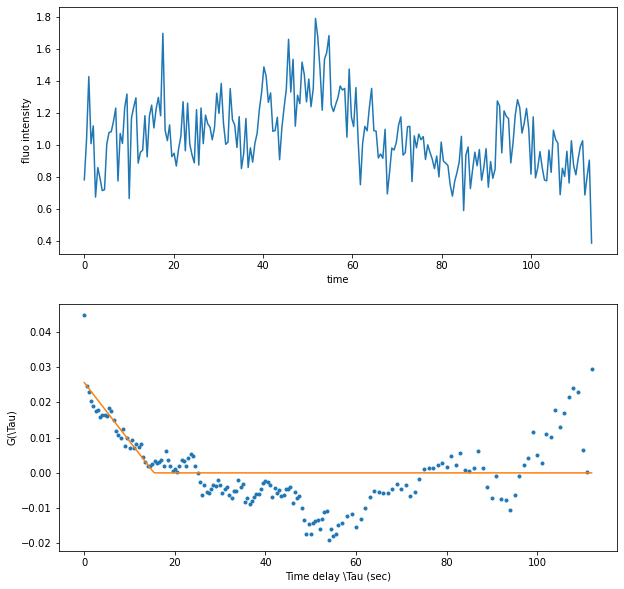

In [7]:
# Analyse one track
# Choose your track id
id_= np.unique(datas.TRACK_ID)[1]
# id_ = 0
print(id_)

x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values/2**16*100
fig, ax = plt.subplots(2,1)
ax[0].plot(x,y)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")

mm = int(len(datas[datas.TRACK_ID==id_])/2-1)
if (mm%2)==0: 
    autocor = multipletau.autocorrelate(y,
                                    m=mm,
                                    deltat=0.5, 
                                    normalize=True)
else: 
    autocor = multipletau.autocorrelate(y,
                                    m=mm+1,
                                    deltat=0.5,
                                    normalize=True)



popt, pcov = optimize.curve_fit(func_, 
                            autocor.flatten()[0::2],
                            autocor.flatten()[1::2], 
                            method='lm' )


ax[1].plot(autocor.flatten()[0::2], autocor.flatten()[1::2], '.')
ax[1].plot(autocor.flatten()[0::2], func_(autocor.flatten()[0::2], *popt) )
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")

fig.set_size_inches((10,10))

In [289]:
966/16, 1300/25

(60.375, 52.0)

# Multiple file analysis

In [714]:
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/1-ConfirmData/movie twiCrispr/"
# path = "/mnt/sda1/Sophie/2-KineticAnalysisData/1-ConfirmData/movie fast ilp4/"
files = [
         "M142Het CJD1 ultrafast 0_10 in nc13 e1_Airyscan Processing/track_spot_table.csv",
         "M142Het CJD1 ultrafast 0_20 in nc14 e1_Airyscan Processing/track_spot_table.csv",
         "M142Het CJD1 ultrafast 0_20 in nc14 e2_Airyscan Processing/track_spot_table.csv",
         "M142Het CJD1 ultrafast 0_20 in nc14 e4_Airyscan Processing/track_spot_table.csv",
         "M142Het CJD1 ultrafast 0_20 in nc14 e5_Airyscan Processing/track_spot_table.csv",
         "save/track_spot_table2.csv",
#           "2D/track_spot_table.csv",
#           "2D/track_spot_table2.csv",
        ]

# path = "/mnt/sda1/Sophie/2-KineticAnalysisData/1-ConfirmData/movie fast ilp4/"
# files = [
#          "scfvhet ilp4 laser 5percent zoom8 time frame754.2ms__Airyscan Processing_nc14/track_spot_table.csv",
#         ]

In [723]:
columns = ['file_name', 'track_id','len_track', 'elongation_time', 'init_translation_rate']
result = pd.DataFrame(columns=columns, dtype=float)
elongation_time=[]
translation_rate=[]
for f in files:
    f = path+f
    datas = pd.read_csv(f)
    datas.drop(index=[0,1,2], inplace=True)
    datas['FRAME'] = pd.to_numeric(datas["FRAME"])
    datas['POSITION_X'] = pd.to_numeric(datas["POSITION_X"])
    datas['POSITION_Y'] = pd.to_numeric(datas["POSITION_Y"])
    datas['TRACK_ID'] = pd.to_numeric(datas["TRACK_ID"])
    datas['MEAN_INTENSITY_CH1'] = pd.to_numeric(datas["MEAN_INTENSITY_CH1"])
    datas['POSITION_T'] = pd.to_numeric(datas["POSITION_T"])
    datas.drop("MANUAL_SPOT_COLOR", axis=1, inplace=True)
    datas = datas.dropna(axis=0)
    


    for id_ in np.unique(datas['TRACK_ID']):
        
        x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
        y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values
        if len(x)>10:
            mm = int(len(datas[datas.TRACK_ID==id_])/2-1)
            if (mm%2)==0: 
                autocor = multipletau.autocorrelate(y,
                                                m=mm,
                                                deltat=0.5, 
                                                normalize=True)
            else: 
                autocor = multipletau.autocorrelate(y,
                                                m=mm+1,
                                                deltat=0.5,
                                                normalize=True)



            popt, pcov = optimize.curve_fit(func_, 
                                        autocor.flatten()[0::2][1:],
                                        autocor.flatten()[1::2][1:], 
                                        method='lm' )
            if popt[0]>5: #5
                if len(x)*0.5>100:
                    d = pd.DataFrame.from_dict({'file_name':f.split('/')[-2],
                                                'track_id':id_,
                                                'len_track': len(x)*0.5,
                                                'elongation_time':popt[0],
                                                'init_translation_rate':popt[1]},
                                               orient='index').T
                    result = pd.concat([result, d], ignore_index=True)

# result.drop(result[result["len_track"]<100].index, inplace=True)

In [724]:
result['elongation_time_norm'] = 1300/result['elongation_time']
result['init_translation_rate_norm'] = result['init_translation_rate']
result['tmp'] = 1

In [725]:
result

,file_name,track_id,len_track,elongation_time,init_translation_rate,elongation_time_norm,init_translation_rate_norm,tmp
0,M142Het CJD1 ultrafast 0_10 in nc13 e1_Airysca...,4,126.0,36.999891,1.465089,35.135239,1.465089,1
1,M142Het CJD1 ultrafast 0_20 in nc14 e1_Airysca...,447,159.5,24.364663,7.556234,53.35596,7.556234,1
2,M142Het CJD1 ultrafast 0_20 in nc14 e4_Airysca...,9,184.0,21.188776,4.675414,61.353236,4.675414,1
3,M142Het CJD1 ultrafast 0_20 in nc14 e4_Airysca...,105,142.5,10.999968,19.377802,118.182163,19.377802,1
4,M142Het CJD1 ultrafast 0_20 in nc14 e4_Airysca...,214,149.0,6.781792,8.911595,191.689759,8.911595,1
5,save,0,189.5,37.190996,1.624177,34.954697,1.624177,1


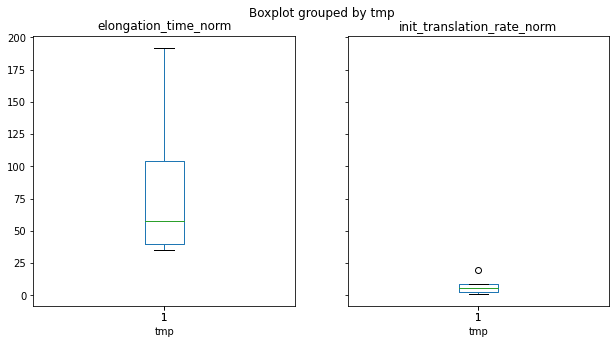

In [726]:
# result['elongation_time'] = pd.to_numeric(result['elongation_time'])
fig, ax = result.boxplot(['elongation_time_norm', 'init_translation_rate_norm'] , 
#                          by='file_name', 
                         by='tmp',
                         grid=False, 
                         figsize=(10,5))


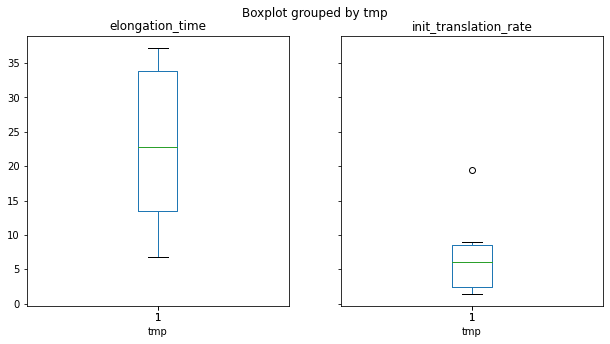

In [727]:
# result['elongation_time'] = pd.to_numeric(result['elongation_time'])
fig, ax = result.boxplot(['elongation_time', 'init_translation_rate'] , 
#                          by='file_name', 
                         by='tmp', 
                         grid=False, 
                         figsize=(10,5))


In [728]:
result.mean()

/tmp/ipykernel_104492/2046019998.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result.mean()


track_id                      129.833333
len_track                     158.416667
elongation_time                22.921014
init_translation_rate           7.268385
elongation_time_norm           82.445176
init_translation_rate_norm      7.268385
tmp                             1.000000
dtype: float64

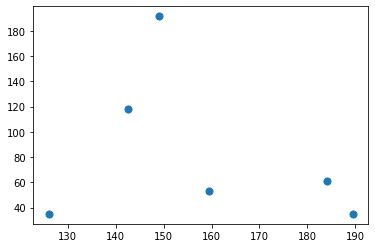

In [729]:
plt.scatter(result['len_track'], result['elongation_time_norm'], s=50)

# plot all track that was keep in result table

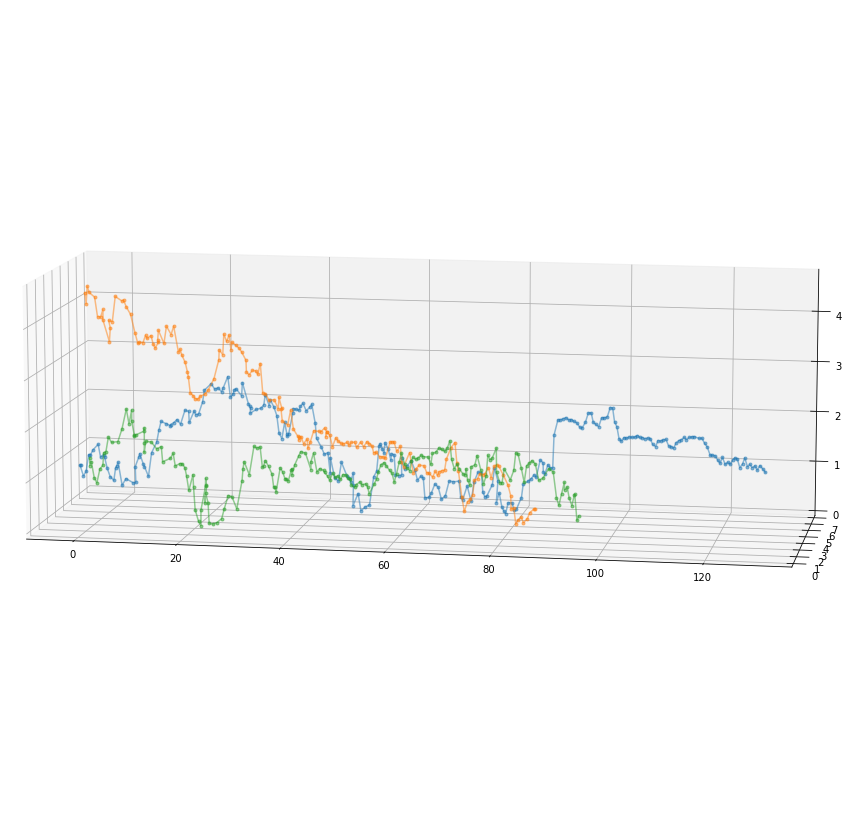

In [585]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.5, 0.5, 1]))
ax.set_box_aspect(aspect = (3,1,1))


for id_ in np.unique(result['track_id']):
    x = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()))
    y = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()))
    z = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()))
    
    ax.plot(x, 
            y, 
            z, 
            '.-',
            alpha = 0.5
            )


fig.set_size_inches((15, 15))

ax.view_init(elev=10., azim=-80)

125
[36.99989114  1.46508914]
[  40.13525322 1013.59020436]
82
[17.79892294 10.0542773 ]
[ 83.4320147  147.69833334]
93
[27.49989746  6.33738   ]
[ 54.00020135 234.32396349]


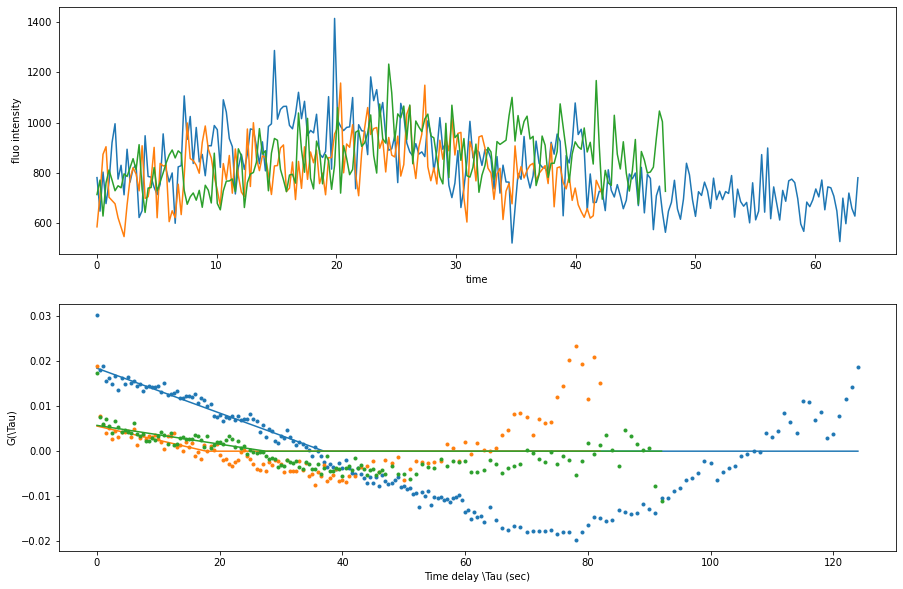

In [606]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(2,1)

colors = list(mcolors.TABLEAU_COLORS.keys())

i=0
for id_ in np.unique(result['track_id'].to_numpy()):

    x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
    y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values
    
    ax[0].plot(x*0.5, y, color=colors[i])


    mm = int(len(datas[datas.TRACK_ID==id_])/2-1)
    print(mm)
    if (mm%2)==0: 
        autocor = multipletau.autocorrelate(y,
                                        m=mm,
                                        deltat=0.5, 
                                        normalize=True,
                                           )
    else: 
        autocor = multipletau.autocorrelate(y,
                                        m=mm+1,
                                        deltat=0.5,
                                        normalize=True,
                                           )



    popt, pcov = optimize.curve_fit(f=func_, 
                                    xdata=autocor.flatten()[0::2][1:],
                                    ydata=autocor.flatten()[1::2][1:],
                                    method='lm')

    print(popt)
    print(1485/popt)
    ax[1].plot(autocor.flatten()[0::2], autocor.flatten()[1::2], '.', color=colors[i])
    ax[1].plot(autocor.flatten()[0::2], func_(autocor.flatten()[0::2], *popt), color=colors[i] )
    if i == 7:
        i=0
    else:
        i+=1

ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")

fig.set_size_inches((15,10))

In [591]:
result

,file_name,track_id,len_track,elongation_time,init_translation_rate,elongation_time_norm,init_translation_rate_norm,tmp
0,M142Het CJD1 ultrafast 0_10 in nc13 e1_Airysca...,4,126.0,36.999891,1.465089,40.135253,1.465089,1
1,M142Het CJD1 ultrafast 0_10 in nc13 e1_Airysca...,12,83.5,17.798923,10.054277,83.432015,10.054277,1
2,M142Het CJD1 ultrafast 0_10 in nc13 e1_Airysca...,108,94.0,27.499897,6.33738,54.000201,6.33738,1


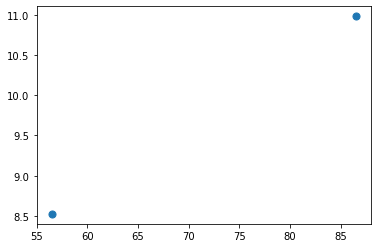

In [411]:
plt.scatter(result['len_track'], result['elongation_time'], s=50)